In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [4]:
df = df.drop(columns=['month', 'day', 'year'], axis = 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
#Feature Selection

X = df.drop('FWI', axis = 1)
y = df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [8]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [9]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

<Axes: >

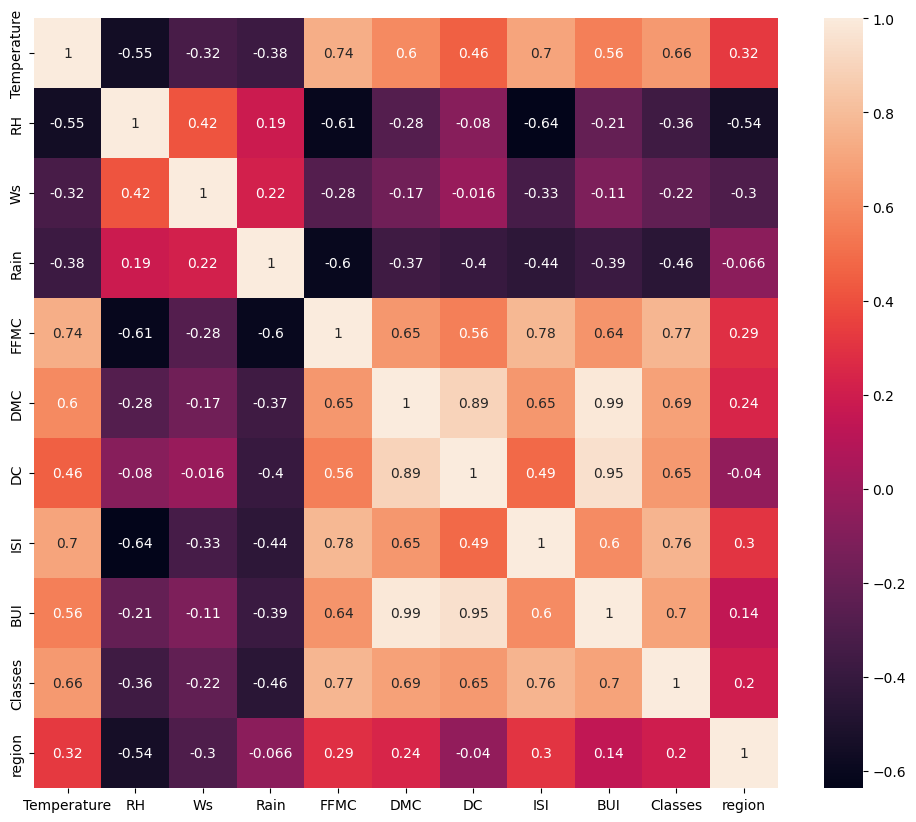

In [10]:
# Feature Selection 

# Checking multi-collinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [11]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.85)

In [13]:
# Dropping features
X_train.drop(corr_features, axis = 1,inplace=True)
X_test.drop(corr_features, axis = 1,inplace=True)

In [14]:
#Feature Scaling or Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

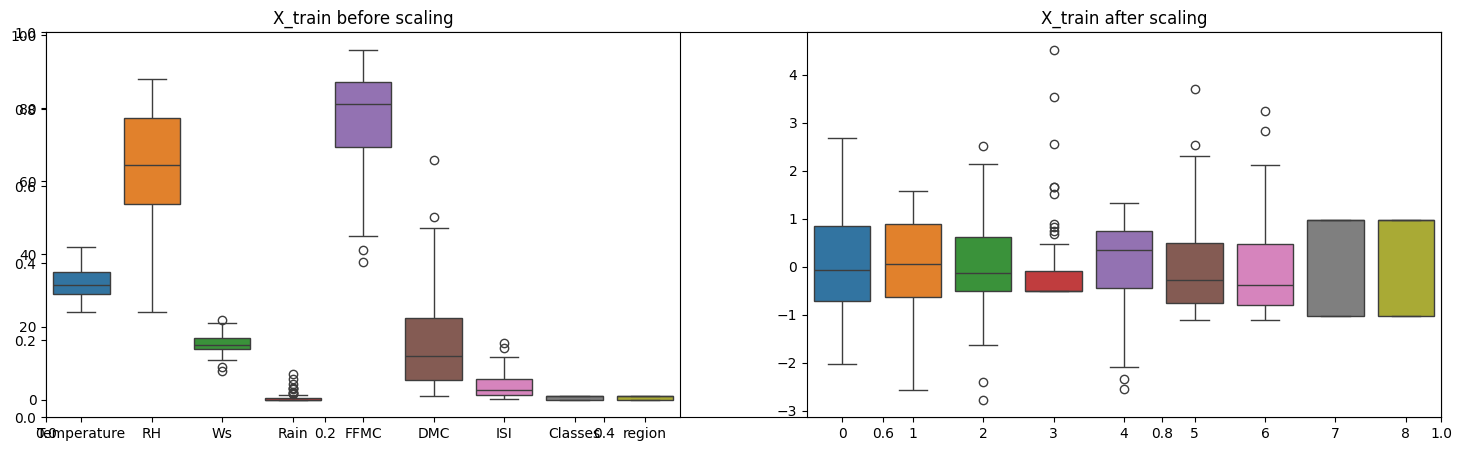

In [15]:
# Box Plots to understand Effect of Standard Scaler
plt.subplots(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scale)
plt.title("X_train after scaling")

# Linear Regression Model

Mean Absolute Error:  1.0487524312874656
Score:  95.0 %


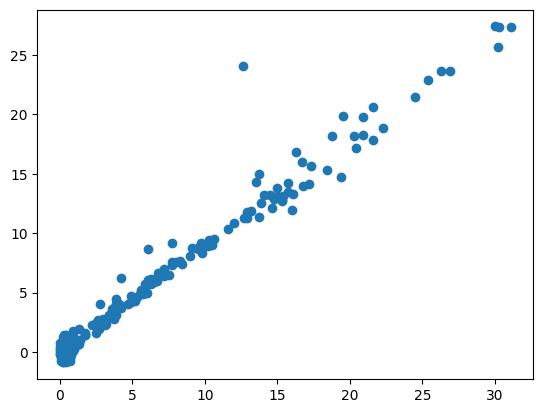

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()

linreg.fit(X_train_scale, y_train)
y_pred = linreg.predict(X_test_scale)

mae = mean_absolute_error(y_test, y_pred)
score = np.floor(r2_score(y_test, y_pred) * 100)
print("Mean Absolute Error: ", mae)
print("Score: ", score,"%")
plt.scatter(y_test, y_pred)

## Lasso Regression

Mean Absolute Error:  1.5207801405556338
Score:  90.0 %


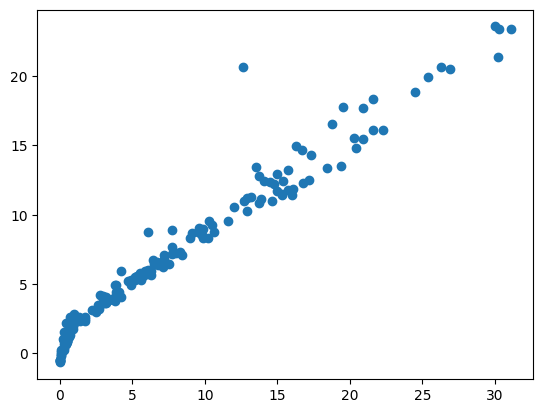

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()

lasso.fit(X_train_scale, y_train)
y_pred = lasso.predict(X_test_scale)

mae = mean_absolute_error(y_test, y_pred)
score = np.floor(r2_score(y_test, y_pred) * 100)
print("Mean Absolute Error: ", mae)
print("Score: ", score,"%")
plt.scatter(y_test, y_pred)

## Ridge Regression

Mean Absolute Error:  1.0408367456656649
Score:  95.0 %


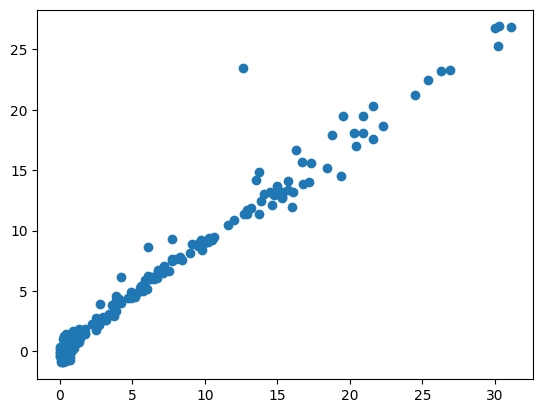

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()

ridge.fit(X_train_scale, y_train)
y_pred = ridge.predict(X_test_scale)

mae = mean_absolute_error(y_test, y_pred)
score = np.floor(r2_score(y_test, y_pred) * 100)
print("Mean Absolute Error: ", mae)
print("Score: ", score,"%")
plt.scatter(y_test, y_pred)

## Elastic Net Regression

Mean Absolute Error:  2.1390541174640196
Score:  82.0 %


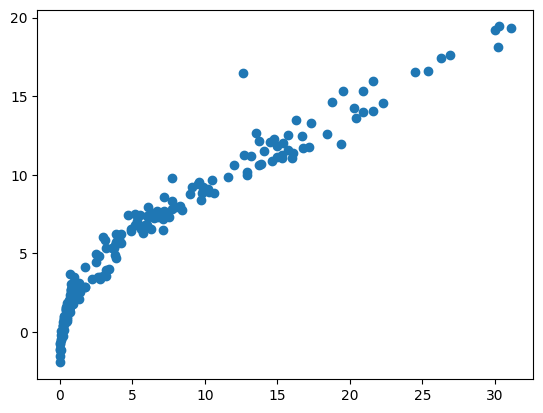

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()

elastic.fit(X_train_scale, y_train)
y_pred = elastic.predict(X_test_scale)

mae = mean_absolute_error(y_test, y_pred)
score = np.floor(r2_score(y_test, y_pred) * 100)
print("Mean Absolute Error: ", mae)
print("Score: ", score,"%")
plt.scatter(y_test, y_pred)

In [20]:
import pickle 

pickle.dump()

TypeError: dump() missing required argument 'obj' (pos 1)